Name: Zhenmin Hua  
Github username: Zeddhua2077  
USC_ID: 5905057247

# 552_HW2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## 1.a

In [3]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

In [90]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## 1.b

### 1.b.(i)

In [91]:
rows_num = df.shape[0]
cols_num = df.shape[1]
print('number of rows: %d' % rows_num)
print('number of columns: %d' % cols_num)

number of rows: 9568
number of columns: 5


What do the rows and columns represent?
- Rows represents records of features of the power plant in 6 years.
- Columns represents variables(features)  
    X: Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)  
    Y: hourly electrical energy output (EP) 

### 1.b.(ii)

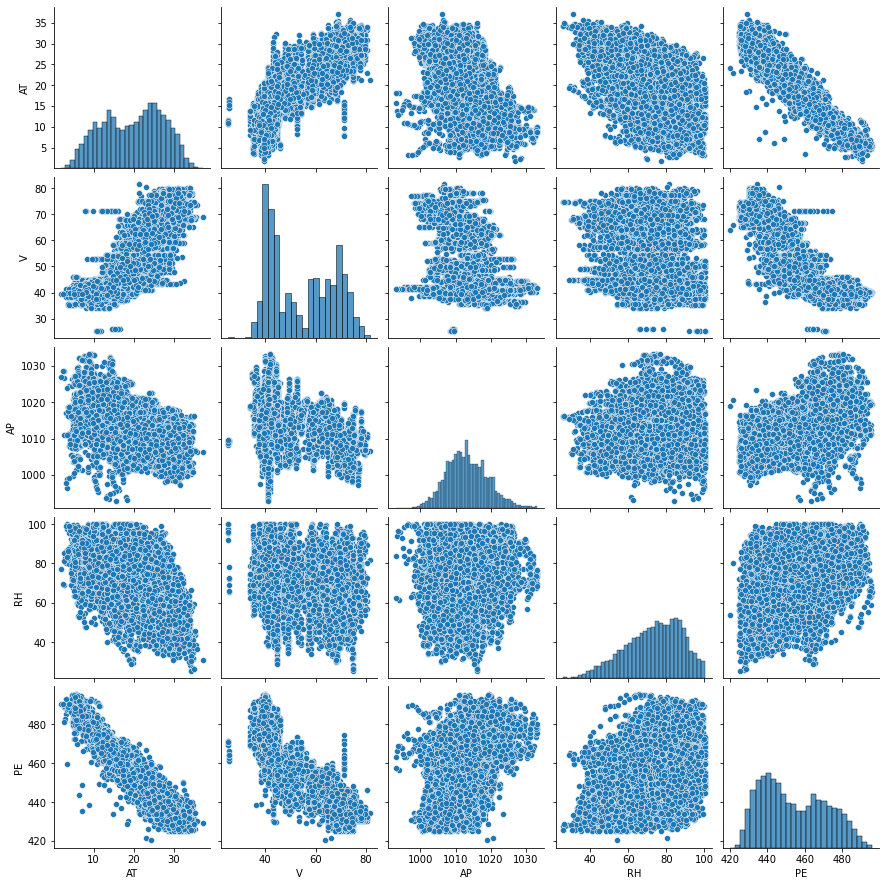

In [92]:
sns.pairplot(data=df)

**Findings:**
- AT and PE seem to have linear correlation.

### 1.b.(iii)

In [93]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## 1.c

lr_1.score: 0.9042710517214759
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:16   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341

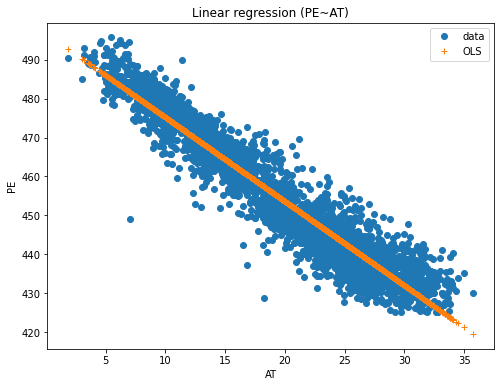

lr_2.score: 0.7644504828207674
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:16   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015

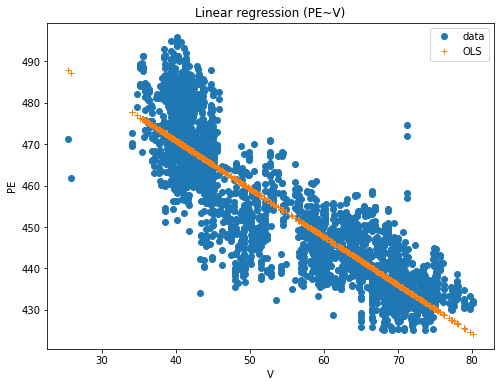

lr_3.score: 0.25912772398810757
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:17   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.261

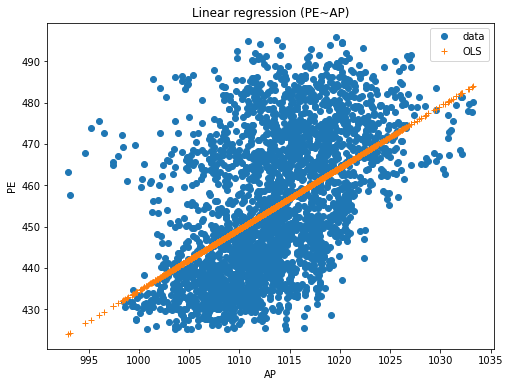

lr_4.score: 0.1488957960039855
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:17   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618

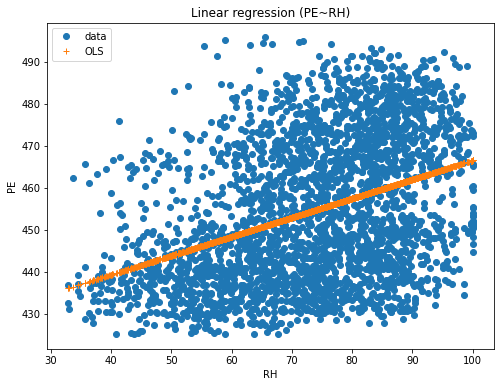

In [94]:
#AT
all_x = df[['AT']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
lr_1 = LinearRegression()
lr_1.fit(x_train, y_train)
lr_1_coef = lr_1.coef_
lr_1_intercept = lr_1.intercept_
y_pred = lr_1.predict(x_test)
print('lr_1.score:', lr_1.score(x_test, y_test))
#statistical testing
data = df[['AT', 'PE']]
model = ols('PE~AT', data).fit()
print(model.summary())
#plot
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_test, 'o', label="data")
plt.plot(x_test, y_pred, '+', label="OLS")
plt.legend()  
plt.title('Linear regression (PE~AT)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

#V
all_x = df[['V']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
lr_2 = LinearRegression()
lr_2.fit(x_train, y_train)
lr_2_coef = lr_2.coef_
lr_2_intercept = lr_2.intercept_
y_pred = lr_2.predict(x_test)
print('lr_2.score:', lr_2.score(x_test, y_test))
#statistical testing
data = df[['V', 'PE']]
model = ols('PE~V', data).fit()
print(model.summary())
#plot
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_test, 'o', label="data")
plt.plot(x_test, y_pred, '+', label="OLS") 
plt.legend()  
plt.title('Linear regression (PE~V)')
plt.xlabel('V')
plt.ylabel('PE')
plt.show()

#AP
all_x = df[['AP']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
lr_3 = LinearRegression()
lr_3.fit(x_train, y_train)
lr_3_coef = lr_3.coef_
lr_3_intercept = lr_3.intercept_
y_pred = lr_3.predict(x_test)
print('lr_3.score:', lr_3.score(x_test, y_test))
#statistical testing
data = df[['AP', 'PE']]
model = ols('PE~AP', data).fit()
print(model.summary())
#plot
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_test, 'o', label="data")
plt.plot(x_test, y_pred, '+', label="OLS")
plt.legend()  
plt.title('Linear regression (PE~AP)')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

#RH
all_x = df[['RH']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
lr_4 = LinearRegression()
lr_4.fit(x_train, y_train)
lr_4_coef = lr_4.coef_
lr_4_intercept = lr_4.intercept_
y_pred = lr_4.predict(x_test)
print('lr_4.score:', lr_4.score(x_test, y_test))
#statistical testing
data = df[['RH', 'PE']]
model = ols('PE~RH', data).fit()
print(model.summary())
#plot
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_test, 'o', label="data")
plt.plot(x_test, y_pred, '+', label="OLS")
plt.legend()  
plt.title('Linear regression (PE~RH)')
plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

**Results**
- PE~AT
    - R^2 = 0.9042710517214759
    - AT's coefficient's p-value <0.05. It is statistically significant. So there is a statistically significant association between the predictor and the response.
- PE~V
    - R^2 = 0.7644504828207674
    - V's coefficient's p-value <0.05. It is statistically significant. So there is a statistically significant association between the predictor and the response.
- PE~AP
    - R^2 = 0.25912772398810757
    - AP's coefficient's p-value <0.05. It is statistically significant. So there is a statistically significant association between the predictor and the response.
- PE~RH
    - R^2 = 0.1488957960039855
    - RH's coefficient's p-value <0.05. It is statistically significant. So there is a statistically significant association between the predictor and the response.
- Outliers
    - According to the four plots, there indeed exist some outliers that I want to remove.

## 1.d

In [95]:
x = df[['AT','V','AP','RH']]
y = df['PE']
lr_d = LinearRegression()
lr_d.fit(x, y)
lr_d_coef = lr_d.coef_
lr_d_intercept = lr_d.intercept_
print('lr_d.coef_:', lr_d_coef)
print('lr_d.intercept_:', lr_d_intercept) 
print('lr_d.score(R^2):', lr_d.score(x, y))

lr_d.coef_: [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
lr_d.intercept_: 454.6092743153102
lr_d.score(R^2): 0.9286960898122536


In [96]:
x = df[['AT','V','AP','RH']] 
y = df['PE']
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit() # lr=ols('PE~ AT + V + AP + RH', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Results**
- R^2 = 0.9286960898122536
- coefficients:[-1.97751311,-0.23391642,0.06208294,-0.1580541]
- intercept: 454.6092743153102
- According to statistical testing, the four predictors are all statistically significant(p-value<0.05). So all of them will reject the null hypothesis.

## 1.e

**How do your results from 1c compare to your results from 1d?**
- The linear model created in 1d has better performance than that in 1c.

In [97]:
uni_lr_coefs = [lr_1_coef, lr_2_coef, lr_3_coef, lr_4_coef]
multi_lr_coefs = list(lr_d_coef)

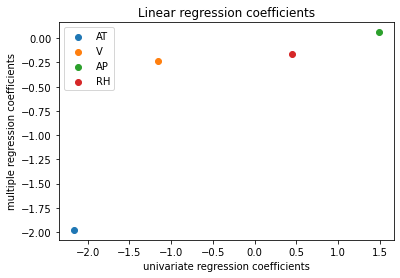

In [98]:
plt.scatter(uni_lr_coefs[0], multi_lr_coefs[0], label='AT') 
plt.scatter(uni_lr_coefs[1], multi_lr_coefs[1], label='V') 
plt.scatter(uni_lr_coefs[2], multi_lr_coefs[2], label='AP') 
plt.scatter(uni_lr_coefs[3], multi_lr_coefs[3], label='RH') 
plt.title('Linear regression coefficients')
plt.xlabel('univariate regression coefficients')
plt.ylabel('multiple regression coefficients')
plt.legend()
plt.show()

## 1.f

In [99]:
#AT poly
all_x = df[['AT']]
x_poly = PolynomialFeatures(3).fit_transform(all_x)
all_y = df['PE']
lr_1_poly = LinearRegression()
lr_1_poly.fit(x_poly, all_y)
lr_1_poly_coef = lr_1_poly.coef_
lr_1_poly_intercept = lr_1_poly.intercept_
y_pred = lr_1_poly.predict(x_poly)
print('lr_1_poly.score（R^2）:', lr_1_poly.score(x_poly, all_y))
print('intercept:', lr_1_poly.intercept_)
print('coefficients:', lr_1_poly.coef_)

#V poly
all_x = df[['V']]
x_poly = PolynomialFeatures(3).fit_transform(all_x)
all_y = df['PE']
lr_2_poly = LinearRegression()
lr_2_poly.fit(x_poly, all_y)
lr_2_poly_coef = lr_2_poly.coef_
lr_2_poly_intercept = lr_2_poly.intercept_
y_pred = lr_2_poly.predict(x_poly)
print('lr_2_poly.score（R^2）:', lr_2_poly.score(x_poly, all_y))
print('intercept:', lr_2_poly.intercept_)
print('coefficients:', lr_2_poly.coef_)

#AP poly
all_x = df[['AP']]
x_poly = PolynomialFeatures(3).fit_transform(all_x)
all_y = df['PE']
lr_3_poly = LinearRegression()
lr_3_poly.fit(x_poly, all_y)
lr_3_poly_coef = lr_3_poly.coef_
lr_3_poly_intercept = lr_3_poly.intercept_
y_pred = lr_3_poly.predict(x_poly)
print('lr_3_poly.score（R^2）:', lr_3_poly.score(x_poly, all_y))
print('intercept:', lr_3_poly.intercept_)
print('coefficients:', lr_3_poly.coef_)

#RH poly
all_x = df[['RH']]
x_poly = PolynomialFeatures(3).fit_transform(all_x)
all_y = df['PE']
lr_4_poly = LinearRegression()
lr_4_poly.fit(x_poly, all_y)
lr_4_poly_coef = lr_4_poly.coef_
lr_4_poly_intercept = lr_4_poly.intercept_
y_pred = lr_4_poly.predict(x_poly)
print('lr_4_poly.score（R^2）:', lr_4_poly.score(x_poly, all_y))
print('intercept:', lr_4_poly.intercept_)
print('coefficients:', lr_4_poly.coef_)

lr_1_poly.score（R^2）: 0.9118826627742724
intercept: 492.72814333734135
coefficients: [ 0.         -0.61034571 -0.12513818  0.00267485]
lr_2_poly.score（R^2）: 0.7750219775589422
intercept: 554.1468490634979
coefficients: [ 0.00000000e+00 -2.14437732e+00 -2.71228490e-03  1.34357110e-04]
lr_3_poly.score（R^2）: 0.29754346577739654
intercept: 5236219.869597154
coefficients: [ 0.00000000e+00 -1.54608659e+04  1.52162523e+01 -4.99115985e-03]
lr_4_poly.score（R^2）: 0.15374253544345995
intercept: 468.4135359713741
coefficients: [ 0.00000000e+00 -1.72921131e+00  3.21451721e-02 -1.52187969e-04]


## 1.g

In [100]:
x = df[['AT','V','AP','RH']]
y = df['PE']
poly = PolynomialFeatures(2, interaction_only=True).fit(x)
features = poly.get_feature_names(x.columns)
x_poly = poly.transform(x)
lr = LinearRegression()
lr.fit(x_poly, y)
lr_coef = lr.coef_
lr_intercept = lr.intercept_
print('lr.score:', lr.score(x_poly, y))
print('lr.coef_:', lr_coef)
print('lr.intercept_:', lr_intercept) 

#statsmodel
X_ = sm.add_constant(x_poly) # adding a constant
model = sm.OLS(y, X_).fit()
print(model.summary())
print('Features:', features)

lr.score: 0.9363057529178327
lr.coef_: [ 0.00000000e+00 -4.34701412e+00 -7.67485763e+00 -1.52354642e-01
  1.57090705e+00  2.09709231e-02  1.75904518e-03 -5.23035364e-03
  6.81235433e-03  8.38633179e-04 -1.61179894e-03]
lr.intercept_: 685.7824681475172
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:17   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust

**Results**
- x1(AT), x6(AT\*AP), x9(V\*RH) are statistically insignificant
- In terms of significant interaction relationships, x5(AT\*V), x7(AT\*RH), x8(V\*AP), x10(AP\*RH) are statistically significant(P-values of them are all < 0.05).

## 1.h

In [101]:
all_x = df[['AT','V','AP','RH']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('MSE_train:', mean_squared_error(y_train, y_pred_train))
print('MSE_test:', mean_squared_error(y_test, y_pred_test))

MSE_train: 21.10238757312769
MSE_test: 20.01171384252854


In [102]:
all_x = df[['AT','V','AP','RH']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
poly = PolynomialFeatures(2)
features = poly.fit(x_train).get_feature_names(x_train.columns)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('MSE_train_poly_original:', mean_squared_error(y_train, y_pred_train))
print('MSE_test_poly_original:', mean_squared_error(y_test, y_pred_test))

#statsmodel statistic testing
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())
print('Features:', features)

MSE_train_poly_original: 18.52349743594223
MSE_test_poly_original: 17.169141124024286
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     6977.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:18   Log-Likelihood:                -19277.
No. Observations:                6697   AIC:                         3.858e+04
Df Residuals:                    6682   BIC:                         3.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [103]:
#remove_lst = [1, 2, 7, 9, 10, 11] #x1,x2,x7,x9,x10,x11 (p-value>0.05)
sig_lst = [3,4,5,6,8,12,13,14] #(p-value<0.05)
sig_features = [features[i] for i in sig_lst]
sig_features

['AP', 'RH', 'AT^2', 'AT V', 'AT RH', 'AP^2', 'AP RH', 'RH^2']

In [105]:
all_x = df[['AT','V','AP','RH']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
model_1 = ols('PE ~ AP + RH + I(AT**2) + AT:V + AT:RH + I(AP**2) + AP:RH + I(RH**2)', data=pd.concat([x_train, y_train], axis=1)).fit()
y_pred_train = model_1.predict(x_train)
y_pred_test = model_1.predict(x_test)
print('MSE_train_poly_optimized:', mean_squared_error(y_train, y_pred_train))
print('MSE_test_poly_optimized:', mean_squared_error(y_test, y_pred_test))
print(model_1.summary())
print(model_1.params)

MSE_train_poly_optimized: 20.562784759076678
MSE_test_poly_optimized: 19.340697561869874
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.093e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:11:18   Log-Likelihood:                -19627.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6688   BIC:                         3.933e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

**Results**
- Multiple regression
    - MSE_train: 21.10238757312769
    - MSE_test: 20.01171384252854
- Original poly multiple regression 
    - MSE_train_poly_original: 18.52349743594223
    - MSE_test_poly_original: 17.169141124024286
- Optimized poly multiple regression 
    - MSE_train_poly_optimized: 20.562784759076678
    - MSE_test_poly_optimized: 19.340697561869874

## 1.i

Best k: 6
Minimum test error: 0.051927301329188436


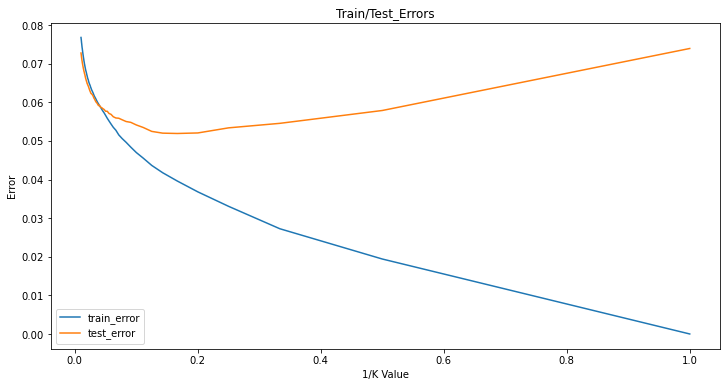

In [106]:
# raw features

all_x = df[['AT','V','AP','RH']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)

error_train = []
error_test = []
for k in range(1,101):
    knn = KNeighborsRegressor(k)
    knn.fit(x_train,y_train)
    error_train.append([1-knn.score(x_train, y_train), k])
    error_test.append([1-knn.score(x_test, y_test), k])

#train/test error plot
plt.figure(figsize=(12, 6))
plt.plot([1/i for i in range(1,101)], [i[0] for i in error_train], label='train_error')
plt.plot([1/i for i in range(1,101)], [i[0] for i in error_test], label='test_error')
plt.title('Train/Test_Errors') 
plt.xlabel('1/K Value')
plt.ylabel('Error')
plt.legend()

#find best k based on test error
error_test.sort()
best_k = error_test[0][1]
min_error = error_test[0][0]
print('Best k:', best_k)
print('Minimum test error:', min_error)

Best k: 10
Minimum test error: 0.05981387238445446


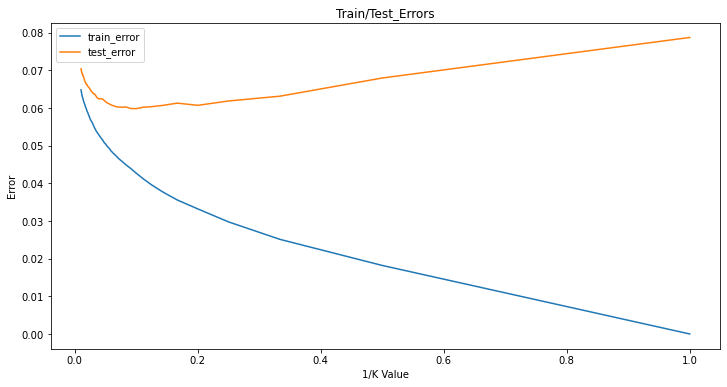

In [107]:
# normalized features

all_x = df[['AT','V','AP','RH']]
all_y = df['PE']
x_train,x_test,y_train,y_test = train_test_split(all_x, all_y, train_size=0.7, random_state=30)
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

error_train = []
error_test = []
for k in range(1,101):
    knn = KNeighborsRegressor(k)
    knn.fit(x_train,y_train)
    error_train.append([1-knn.score(x_train, y_train), k])
    error_test.append([1-knn.score(x_test, y_test), k])

#train/test error plot
plt.figure(figsize=(12, 6))
plt.plot([1/i for i in range(1,101)], [i[0] for i in error_train], label='train_error')
plt.plot([1/i for i in range(1,101)], [i[0] for i in error_test], label='test_error')
plt.title('Train/Test_Errors') 
plt.xlabel('1/K Value')
plt.ylabel('Error')
plt.legend()

#find best k based on test error
error_test.sort()
best_k = error_test[0][1]
min_error = error_test[0][0]
print('Best k:', best_k)
print('Minimum test error:', min_error)

**KNN Regression**:  
- **Using raw features**  
    - best k: 6
    - minimum test error: 0.052
- **Using normalized features**
    - best k: 10
    - minimum test error: 0.060

## 1.j

The minimum test error from KNN regression is 0.052  
The minimum MSE from multiple linear regression is 17.169141124024286

## 2 ISLR: 2.4.1

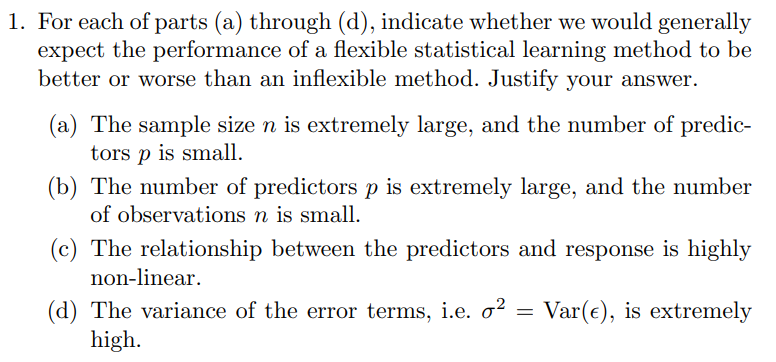

**(a) The sample size n is extremely large, and the number of predictors p is small.**  
Answer:
- Better
- Since the sample size is big, it is not easy to overfit. Flexible model can help fit the data better and reduce bias. 

**(b) The number of predictors p is extremely large, and the number of observations n is small.**  
Answer:
- Worse
- Since the number of observation is small, it is quite easy to overfit. Large number of predictors are already complicating the model. Therefore, flexible model could easily cause overfitting.

**(c) The relationship between the predictors and response is highly non-linear.**  
Answer:
- Better
- Since it is a highly non-linear relationship, flexible model can help to find the this kind of relationship better.

**(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.**  
Answer:
- Worse
- The variance of the error is high means the bias is already small. And if we still use flexible model, the bias will be smaller, but the variance of error will be bigger, and there goes overfitting problem.

## 3 ISLR: 2.4.7

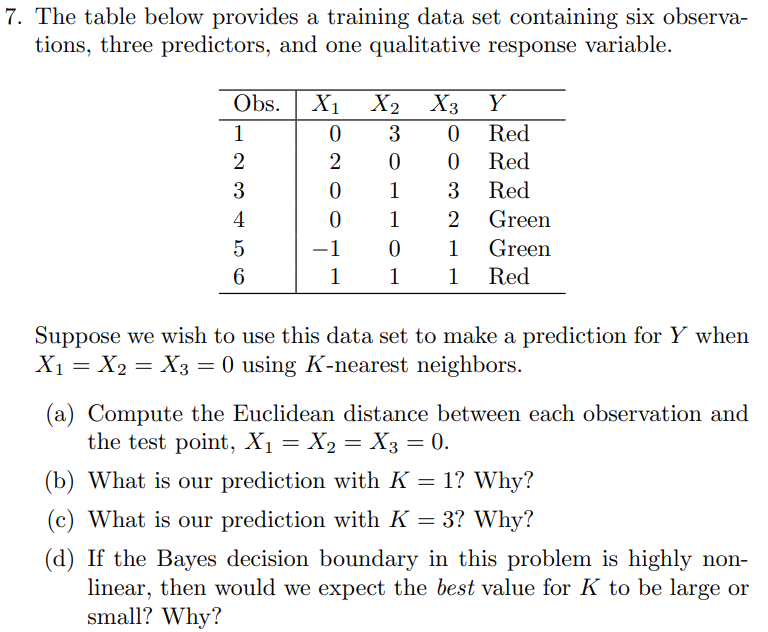

(a)  
Obs1-test: 
$$ Euclidean Distance = \sqrt{(0-0)^2+(3-0)^2+(0-0)^2}=3 $$    
Obs2-test:  
$$ Euclidean Distance = \sqrt{(2-0)^2+(0-0)^2+(0-0)^2}=2 $$   
Obs3-test:  
$$ Euclidean Distance = \sqrt{(0-0)^2+(1-0)^2+(3-0)^2}=3.1622776601683795 $$   
Obs4-test:  
$$ Euclidean Distance = \sqrt{(0-0)^2+(1-0)^2+(2-0)^2}=2.23606797749979 $$   
Obs5-test:  
$$ Euclidean Distance = \sqrt{(-1-0)^2+(0-0)^2+(1-0)^2}=1.4142135623730951 $$   
Obs6-test:  
$$ Euclidean Distance = \sqrt{(1-0)^2+(1-0)^2+(1-0)^2}=1.7320508075688772 $$   

(b)  
**Green**  
K=1, so find the nearest 1 observation point, which is obs.5, which is classified as Green. Therefore, the prediction is Green.

(c)  
**Red**  
K=3, so find 3 nearest observation points, which are obs.2,5,6, which are classified as Red, Green and Red. Red is the most common classification among the three of them. Therefore, the prediction is Red.

(d)  
**Small**  
Since the decision boundry is non-linear, if K is large, the model will be facing underfitting problem and the decision boundry will tend to be linear but which is not. Therefore, K in this case is better to be small, so the model can detect non-linear relationship.